# Machine Learning Algorithms Testing

In [317]:
import os
import pandas as pd
from os import path
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#LR libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#KNN libraries
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#RF libraries
# source - https://www.datacamp.com/tutorial/random-forests-classifier-python
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier

#SVM libraries
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# DT
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# #Ensemble
# from mlxtend.classifier import StackingClassifier

In [328]:
path = os.getcwd()
text_features = pd.read_csv(path + "/book.csv")
text_features_header = list(text_features.columns)

text_features

,Title,Word Count,Sentence Count,AVG Word Length,AVG Sentence Length,Total Syllables,MONOSYLL,POLYSYLL,NTR,VTR,TTR,Root TTR,Corrected TTR,BiLog TTR,LD,FWTR,MIN,MAX
0,0,513,53,5.144250,9.679245,1104,158,355,0.158784,0.162162,0.016892,0.410997,0.290619,0.360708,0.396959,0.030405,8,16
1,1,646,52,5.534056,12.423077,1522,219,427,0.198903,0.124829,0.013717,0.370370,0.261891,0.349317,0.386831,0.048011,6,10
2,2,973,85,5.302158,11.447059,2096,299,665,0.212914,0.113438,0.009599,0.324938,0.229766,0.340415,0.403141,0.017452,8,12
3,3,937,95,5.145144,9.863158,2018,321,615,0.171946,0.103167,0.009955,0.330911,0.233990,0.342185,0.412670,0.021719,8,12
4,4,503,49,5.017893,10.265306,1073,164,339,0.219512,0.099303,0.019164,0.459131,0.324655,0.377465,0.395470,0.003484,6,10
5,5,900,72,4.900000,12.500000,1844,332,563,0.136999,0.105312,0.010252,0.335809,0.237453,0.343626,0.367195,0.033551,6,12
6,6,1279,97,5.036747,13.185567,2596,511,766,0.192617,0.100000,0.007383,0.284970,0.201504,0.328185,0.405369,0.015436,8,16
7,7,720,46,5.243056,15.652174,1603,242,474,0.228288,0.094293,0.013648,0.387458,0.273975,0.358318,0.401985,0.022333,6,10
8,8,374,40,4.997326,9.350000,756,128,246,0.169892,0.122581,0.023656,0.510113,0.360704,0.390407,0.384946,0.047312,8,16
9,9,153,13,4.575163,11.769231,275,57,93,0.137755,0.102041,0.056122,0.785714,0.555584,0.454309,0.382653,0.076531,3,8


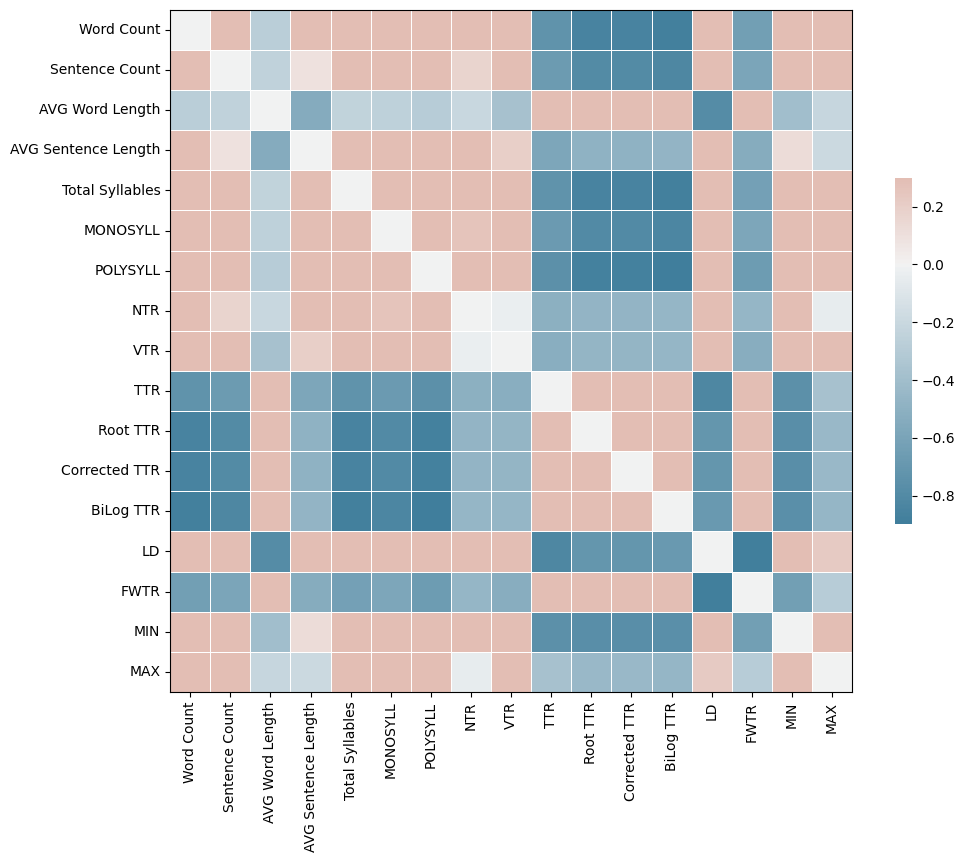

In [332]:
import seaborn as sns
import matplotlib.pyplot as plt

# text_features = text_features.drop(columns=['Title'])

corr = text_features.corr()

np.fill_diagonal(corr.values, 0)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

for _, spine in ax.spines.items():
    spine.set_visible(True)

plt.show()

In [361]:
X = text_features.drop(columns=['MIN', 'MAX'])
y = text_features[['MIN', 'MAX']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [311]:
logreg = LogisticRegression(max_iter=1000, penalty='l2')
logreg.fit(X_train_scaled, y_train)

lr_pred = logreg.predict(X_test_scaled)
print("Predictions: ", lr_pred)

accuracy = accuracy_score(y_test, lr_pred)
conf_matrix = confusion_matrix(y_test, lr_pred)

book_titles = X_test.index

# Print the book titles along with the predictions
for i, title in enumerate(book_titles):
    print(f'Book Title: {title}, Predicted Age Range: {lr_pred[i]}')

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Predictions:  ['6-10' '6-10' '6-12' '6-12']
Book Title: 12, Predicted Age Range: 6-10
Book Title: 4, Predicted Age Range: 6-10
Book Title: 18, Predicted Age Range: 6-12
Book Title: 0, Predicted Age Range: 6-12
Accuracy: 0.5
Confusion Matrix:
[[2 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]]


### K-Nearest Neighbors

In [394]:
knn = KNeighborsClassifier(n_neighbors=5)

multi_output_knn = MultiOutputClassifier(knn)
multi_output_knn.fit(X_train_scaled, y_train)

knn_pred = multi_output_knn.predict(X_test_scaled)
book_titles = X_test.index

# book index
for i, title in enumerate(book_titles):
    print(f'Book Title: {title}, Predicted Age Range: {knn_pred[i]}')
print("Predictions: ", knn_pred)

accuracy = accuracy_score(y_test.values.ravel(), knn_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), knn_pred.ravel())
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

# knn_pred = knn.predict(X_test_scaled)
# print("Predictions: ", knn_pred)

# accuracy = accuracy_score(y_test, knn_pred)
# conf_matrix = confusion_matrix(y_test, knn_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')

Book Title: 12, Predicted Age Range: [ 6 10]
Book Title: 4, Predicted Age Range: [ 6 10]
Book Title: 18, Predicted Age Range: [ 8 12]
Book Title: 0, Predicted Age Range: [ 6 10]
Predictions:  [[ 6 10]
 [ 6 10]
 [ 8 12]
 [ 6 10]]
Accuracy: 0.75
Confusion Matrix:
[[2 0 0 0 0]
 [1 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]]


/Users/jerseydayao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jerseydayao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

### Random Forest

In [384]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_output_rf = MultiOutputClassifier(rf)
multi_output_rf.fit(X_train_scaled, y_train)

rf_pred = multi_output_rf.predict(X_test_scaled)
book_titles = X_test.index

# book index
for i, title in enumerate(book_titles):
    print(f'Book Title: {title}, Predicted Age Range: {rf_pred[i]}')
print("Predictions: ", rf_pred)

accuracy = accuracy_score(y_test.values.ravel(), rf_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), rf_pred.ravel())
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Book Title: 12, Predicted Age Range: [ 6 10]
Book Title: 4, Predicted Age Range: [ 6 10]
Book Title: 18, Predicted Age Range: [ 8 12]
Book Title: 0, Predicted Age Range: [ 6 10]
Predictions:  [[ 6 10]
 [ 6 10]
 [ 8 12]
 [ 6 10]]
Accuracy: 0.75
Confusion Matrix:
[[2 0 0 0 0]
 [1 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]]


### Support Vector Machine

In [238]:
clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(X_train_scaled, y_train)

svm_pred = clf_svm.predict(X_test_scaled)
print("Predictions: ", svm_pred)

accuracy = accuracy_score(y_test, svm_pred)
conf_matrix = confusion_matrix(y_test, svm_pred)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Predictions:  ['6-10' '6-10' '6-12' '8+']
Accuracy: 0.75
Confusion Matrix:
[[2 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 1 0 0]]


### Decision Trees

In [383]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=2)

multi_output_dt = MultiOutputClassifier(dt)
multi_output_dt.fit(X_train_scaled, y_train)

dt_pred = multi_output_dt.predict(X_test_scaled)
book_titles = X_test.index

# book index
for i, title in enumerate(book_titles):
    print(f'Book Title: {title}, Predicted Age Range: {dt_pred[i]}')
print("Predictions: ", dt_pred)

accuracy = accuracy_score(y_test.values.ravel(), dt_pred.ravel())
conf_matrix = confusion_matrix(y_test.values.ravel(), dt_pred.ravel())
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Book Title: 12, Predicted Age Range: [ 6 16]
Book Title: 4, Predicted Age Range: [ 6 16]
Book Title: 18, Predicted Age Range: [ 8 12]
Book Title: 0, Predicted Age Range: [ 6 10]
Predictions:  [[ 6 16]
 [ 6 16]
 [ 8 12]
 [ 6 10]]
Accuracy: 0.5
Confusion Matrix:
[[2 0 0 0 0]
 [1 1 0 0 0]
 [0 0 0 0 2]
 [0 0 0 1 0]
 [0 0 1 0 0]]


## Ensemble Methods

Create meta-model

In [256]:
# used Stacking based on this source: https://www.geeksforgeeks.org/stacking-in-machine-learning-2/
# meta-model used: Linear Regression

meta_model = LogisticRegression()

#### LR + SVM

In [257]:
lr_svm_stack = StackingClassifier(classifiers =[logreg, clf_svm], meta_classifier = meta_model)

model_stack = lr_svm_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

NameError: name 'StackingClassifier' is not defined

#### LR + KNN

In [ ]:
lr_knn_stack = StackingClassifier(classifiers =[logreg, knn], meta_classifier = meta_model)

model_stack = lr_knn_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Predictions:  [ 9 12]
Accuracy: 0.5
Confusion Matrix:
[[0 0 0]
 [1 0 0]
 [0 0 1]]


#### LR + RF

In [ ]:
lr_rf_stack = StackingClassifier(classifiers =[logreg, rf], meta_classifier = meta_model)

model_stack = lr_rf_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Predictions:  [ 9 12]
Accuracy: 0.5
Confusion Matrix:
[[0 0 0]
 [1 0 0]
 [0 0 1]]


#### SVM + KNN

In [ ]:
svm_knn_stack = StackingClassifier(classifiers =[clf_svm, knn], meta_classifier = meta_model)

model_stack = svm_knn_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Predictions:  [ 9 12]
Accuracy: 0.5
Confusion Matrix:
[[0 0 0]
 [1 0 0]
 [0 0 1]]


#### SVM + RF

In [ ]:
svm_rf_stack = StackingClassifier(classifiers =[clf_svm, rf], meta_classifier = meta_model)

model_stack = svm_rf_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')

Predictions:  [ 9 12]
Accuracy: 0.5
Confusion Matrix:
[[0 0 0]
 [1 0 0]
 [0 0 1]]


#### KNN + RF

In [ ]:
knn_rf_stack = StackingClassifier(classifiers =[knn, rf], meta_classifier = meta_model)

model_stack = knn_rf_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.predict(X_test_scaled)
print("Predictions: ", pred_stack)

accuracy = accuracy_score(y_test, pred_stack)
conf_matrix = confusion_matrix(y_test, pred_stack)
print("Accuracy:", accuracy)
print(f'Confusion Matrix:\n{conf_matrix}')